## 使用Keras 分類 Iris

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X.shape

(150, 4)

In [5]:
y.shape

(150,)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [0]:
#X_scaled

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential() 
# Dense: x * w + b 
model.add(tf.keras.layers.Dense(units = 5,  activation = 'relu', input_dim = 4))
model.add(tf.keras.layers.Dense(units = 3))

In [0]:
model = tf.keras.models.Sequential( [
# Dense: x * w + b 
tf.keras.layers.Dense(units = 5,  activation = 'relu', input_dim = 4),
tf.keras.layers.Dense(units = 3)
])

- 如果目標資料是 one-hot 編碼, 使用 categorical_crossentropy.

```
one-hot 編碼範例:
[1,0,0]
[0,1,0]
[0,0,1]
```

- 如果目標是整數 integers,使用sparse_categorical_crossentropy

```
整數範例
1
2
3
```

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn,
                  optimizer='sgd',
                  metrics=['accuracy'])

In [0]:
history = model.fit(X_scaled, y,
                    batch_size = 30,
                    epochs=1000,
                    verbose=0)

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

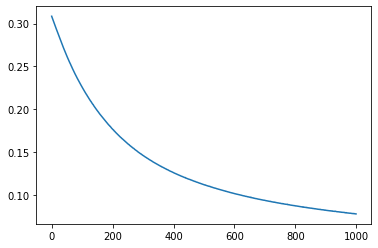

In [27]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

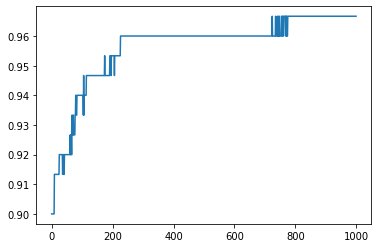

In [28]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

In [0]:
import numpy as np
y_pred = np.argmax(model(X_scaled).numpy(), axis = 1)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9666666666666667

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

In [0]:
n_classes  = 3
y_onehot = tf.keras.utils.to_categorical(iris.target, n_classes)

In [0]:
model2 = tf.keras.models.Sequential( [
# Dense: x * w + b 
tf.keras.layers.Dense(units = 5,  activation = 'relu', input_dim = 4),
tf.keras.layers.Dense(units = 3, activation='softmax')
])

In [0]:
model2.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

In [43]:
history = model2.fit(X_scaled, y_onehot,
                    batch_size = 30,
                    epochs=10,
                    verbose=1)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9733
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9733
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9733
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9733
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9733
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9733
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9733
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9733
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9733
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9733


## 客戶流失分析

### 資料讀取

In [44]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 資料預處理

In [46]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [0]:
# 根據位置篩選資料 .iloc[列,欄]
df = df.iloc[:,3:]

In [49]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [0]:
# 建立虛擬變量 (create dummy variable)
house = pandas.DataFrame([{'區域':'大安區'},
                      {'區域':'中山區'},
                      {'區域':'大同區'},
                      {'區域':'中山區'},
                      {'區域':'大安區'}])

In [58]:
area = pandas.get_dummies(house['區域'])
del area['中山區']
area
#house

,大同區,大安區
0,0,1
1,0,0
2,1,0
3,0,0
4,0,1


In [59]:
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].replace({'yes': 1, 'no': 0})
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [0]:
# 今天天氣真好
# 今天會下大雨

# 今天 天氣 真好 會 下大雨
#  1   1    1   0    0
#  1   0    0   1    1

In [0]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

### 切訓練與測試資料集

In [0]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.33, random_state = 123 )

In [63]:
x.shape, y.shape

((3333, 16), (3333,))

In [64]:
train_x.shape, train_y.shape

((2233, 16), (2233,))

In [65]:
test_x.shape, test_y.shape

((1100, 16), (1100,))

In [68]:
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

### 資料標準化

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

### 建立模型

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([                                 
  tf.keras.layers.Dense(8, activation='relu', input_dim = 16),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_x, train_y,
          batch_size=30,
          epochs=100,
          verbose = 0,
          validation_data=(test_x, test_y))

In [79]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

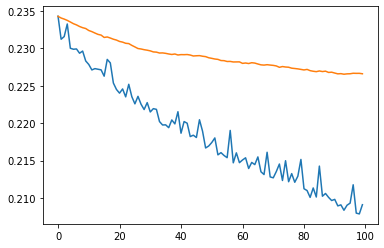

In [80]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))
plt.plot(range(len(history.history.get('val_loss'))), history.history.get('val_loss'))

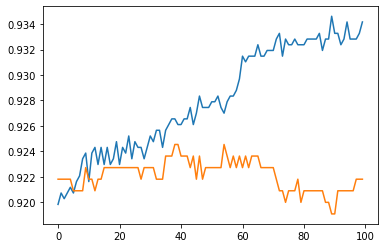

In [81]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))
plt.plot(range(len(history.history.get('val_accuracy'))), history.history.get('val_accuracy'))

###評估預測結果

In [82]:
predictions = model(test_x).numpy()

ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [83]:
predictions

array([[0.7871417 ],
       [0.01863903],
       [0.02990454],
       ...,
       [0.03284294],
       [0.00699295],
       [0.11133883]], dtype=float32)

In [0]:
pred_y = (predictions > 0.5)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y )

0.9218181818181819

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_y )
cm

array([[930,  20],
       [ 66,  84]])

In [96]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       950
           1       0.81      0.56      0.66       150

    accuracy                           0.92      1100
   macro avg       0.87      0.77      0.81      1100
weighted avg       0.92      0.92      0.92      1100

